In [1]:
import cv2
from matplotlib import pyplot as plt

### Carga y preparación de la imagen

In [2]:
img = cv2.imread('TOS-crew.jpg')

In [3]:
img.shape

(1115, 2329, 3)

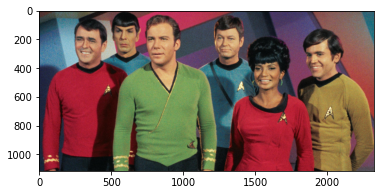

In [4]:
# convertimos imagen a RGB para que matplotlib pueda manejarla (OpenCV usa la codificación BGR)
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_RGB)

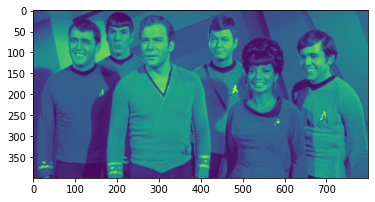

In [5]:
# Si, para precesarla, quremos hacerla más pequeña y pasarla a escala de grises (lo que acelera el aproceso):
img_gray = cv2.cvtColor(img_RGB, cv2.COLOR_RGB2GRAY)
img_small = cv2.resize(img_gray, (800, 400))
plt.imshow(img_small)

### Detección de caras

In [6]:
# cargamos el clasificador preentrenado
detector_caras = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [7]:
detecciones = detector_caras.detectMultiScale(img_RGB)

In [8]:
# array de detecciones. una fila por cada cara. Las columnas con [pos_x, pos_y, size_x, size_y]
detecciones

array([[ 936,  211,   58,   58],
       [ 495,   76,  191,  191],
       [ 708,  109,  235,  235],
       [1199,  120,  195,  195],
       [ 221,  124,  212,  212],
       [1810,  225,  216,  216],
       [1464,  325,  215,  215],
       [1540,  326,  215,  215],
       [1435,  564,  352,  352],
       [ 622,  572,  348,  348],
       [1296,  992,   62,   62]], dtype=int32)

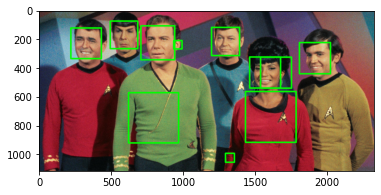

In [9]:
for (x, y, w, h) in detecciones:
    cv2.rectangle(img_RGB, (x, y), (x+w, y+h), (0,255,0), 10)

plt.imshow(img_RGB)

### Parámetro scaleFactor

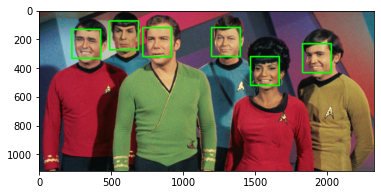

In [10]:
img = cv2.imread('TOS-crew.jpg')
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
detector_caras = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# mientras más grandes sean las caras (respecto a la imagen completa), mayor ha de ser el valor de scaleFactor.
# El valor por defecto para scaleFactor es 1.1
detecciones = detector_caras.detectMultiScale(img_RGB, scaleFactor = 1.7)
for (x, y, w, h) in detecciones:
    cv2.rectangle(img_RGB, (x, y), (x+w, y+h), (0,255,0), 10)

plt.imshow(img_RGB)

### Parámetro minNeighbors

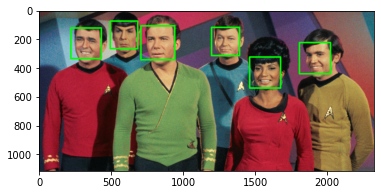

In [16]:
img = cv2.imread('TOS-crew.jpg')
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
detector_caras = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# Número mínimo de detecciones para que haya una detección positiva
detecciones = detector_caras.detectMultiScale(img_RGB, scaleFactor = 1.1, minNeighbors = 20)
for (x, y, w, h) in detecciones:
    cv2.rectangle(img_RGB, (x, y), (x+w, y+h), (0,255,0), 10)

plt.imshow(img_RGB)

### Parámetro minSize y maxSize

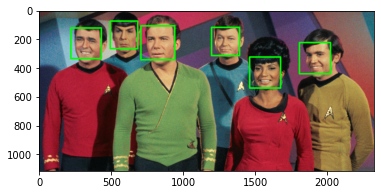

In [17]:
img = cv2.imread('TOS-crew.jpg')
img_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
detector_caras = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
# Podemos quitar detecciones pequeñas indicando el tmaño mínimo de las caras
# lo mismo podemos hacer para el tamaño máximo con maxSize
#detecciones = detector_caras.detectMultiScale(img_RGB, scaleFactor = 1.1, minNeighbors = 10)
detecciones = detector_caras.detectMultiScale(img_RGB, scaleFactor = 1.1, minNeighbors = 10, minSize = (100,100))

for (x, y, w, h) in detecciones:
    cv2.rectangle(img_RGB, (x, y), (x+w, y+h), (0,255,0), 10)

plt.imshow(img_RGB)